In [1]:
# importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [6]:
# opening the file
for expression in os.listdir("G://CANCER DETECTION//train//"):
           print(str(len(os.listdir("G://CANCER DETECTION//train//"+expression)))+
           " "+expression+ 'images')

155 Brain Tumorimages
98 Brain Tumor Negativeimages
155 Brain Tumor positiveimages
562 Breast cancerimages
479 Breast cancer negativeimages
562 Breast cancer Positiveimages
300 Diabetic_retinopathyimages
1056 Malaria_Parasitizedimages
913 Malaria_Uninfectedimages
682 Pneumoniaimages
880 Pneumonia Normalimages


In [3]:
# Defining train and test data to train the model
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("G://CANCER DETECTION//train//",target_size=
(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("G://CANCER DETECTION//valid//",target_size=
(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)

Found 5842 images belonging to 11 classes.
Found 2837 images belonging to 11 classes.


In [7]:
#initialising CNN
model=Sequential()
#conv-1
model.add(Conv2D(64,(3,3), padding='same', input_shape= (48,48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#conv-2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#conv-3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#conv-4
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(11, activation='softmax'))
opt=Adam(lr=0.0005)

C:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
#compiling the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [9]:
epochs=5
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint("model_weights.h5", monitor="val_accuracy", save_weights_only=True, model='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.1, patience=2, min_lr= 0.00001, model= 'auto')

history= model.fit(
          x=train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=validation_steps)

#saving the model
model.save('cancer_disease.h5')

Epoch 1/5
91/91 [==============================] - 379s 4s/step - loss: 0.9094 - accuracy: 0.5838 - val_loss: 1.3131 - val_accuracy: 0.4673
Epoch 2/5
91/91 [==============================] - 244s 3s/step - loss: 0.6423 - accuracy: 0.6603 - val_loss: 0.7819 - val_accuracy: 0.6310
Epoch 3/5
91/91 [==============================] - 208s 2s/step - loss: 0.6092 - accuracy: 0.6630 - val_loss: 0.7562 - val_accuracy: 0.6136
Epoch 4/5
91/91 [==============================] - 206s 2s/step - loss: 0.5876 - accuracy: 0.6651 - val_loss: 0.6381 - val_accuracy: 0.6541
Epoch 5/5
91/91 [==============================] - 205s 2s/step - loss: 0.5656 - accuracy: 0.6641 - val_loss: 0.5564 - val_accuracy: 0.6562


In [5]:
from tensorflow.keras.models import load_model
classifier = load_model('cancer_disease.h5')

1/1 [==============================] - 2s 2s/step


'Brain Tumor'

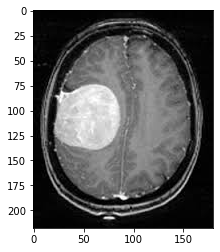

In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = "G://CANCER DETECTION//train//Brain Tumor//Y1.jpg"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(48,48))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p